In [2]:
def listas(n):
    listas = []
    for i in range(n):
        listas.append(list(bin(i)[2:]))
    for i in listas:
        while len(i) < 4:
            i.insert(0,'0')
    return listas  

todos = []
for i in listas(16):
    i = [int(x) for x in i]
    todos.append(i)


[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]


In [3]:
def prox_est(inter_matrix,lista):    
    x = np.array([lista])
    y = np.matmul(x,inter_matrix)
    z = []
    for i in range(0, len(y[0])):
        if y[0][i] > 0:
            z.append(1)
        if y[0][i] < 0:
            z.append(0)
        if y[0][i] == 0:
            z.append(x[0][i])
        

    return z

In [4]:
matriz = [[-1, 0,-1, 0],
          [1, 0, 0, -1],
          [0, -1, 0, 1],
          [0, -1, 1, 0]]

In [6]:
import numpy as np
transicao = []
for i in todos:
    x = ''.join(str(e) for e in i)
    y = ''.join(str(e) for e in prox_est(np.array(matriz).T,i))
    transicao.append((x,y))
    print(x, ":", y)

0000 : 0000
0001 : 0011
0010 : 0011
0011 : 0011
0100 : 0100
0101 : 0000
0110 : 0100
0111 : 0011
1000 : 0100
1001 : 0011
1010 : 0111
1011 : 0011
1100 : 0100
1101 : 0100
1110 : 0100
1111 : 0111


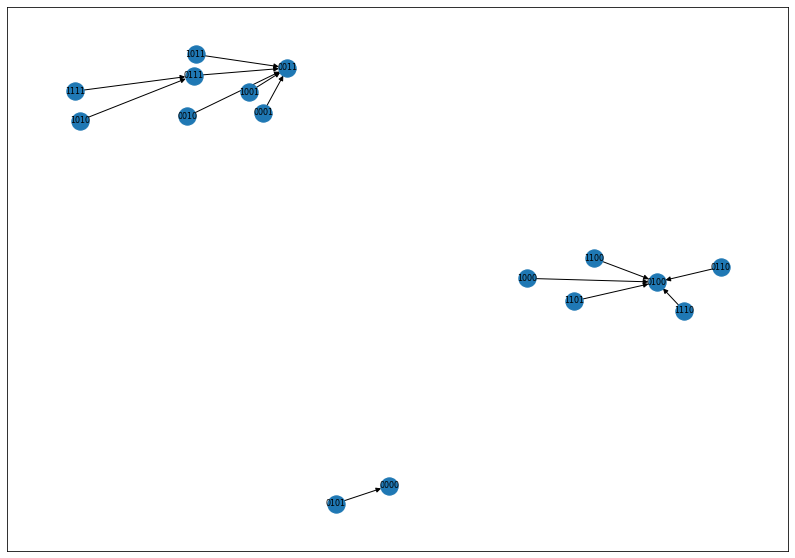

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(transicao)

pos = nx.spring_layout(G)
plt.figure(3,figsize=(14,10)) 
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos,font_size=8)
nx.draw_networkx_edges(G, pos, arrows=True)

plt.show()
